# Undirected networks

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pylab as plt

array([[0., 1., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 1., 0.]])

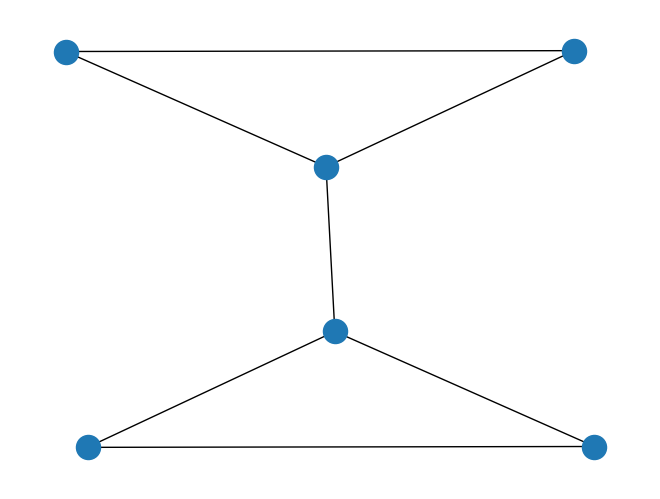

In [ ]:
# Create empty graph
G = nx.Graph()

# Resolution
res = 1

# Add edges to the graph (also adds nodes)
G.add_edges_from([(0,1),(1,2),(0,2), (3,4),(4,5),(5,3), (5,0)])
nx.draw(G, )
c1 = [0,1,2]
c2 = [3,4,5]
c = c1+c2
A_ij = nx.to_numpy_array(G, nodelist=c)
A_ij

In [ ]:
0.5*(A_ij + A_ij.T)
G.degree()

DegreeView({0: 3, 1: 2, 2: 2, 3: 2, 4: 2, 5: 3})

In [ ]:
def degree_vector(graph) -> np.ndarray:
    adj_matrix: np.ndarray = nx.to_numpy_array(graph)
    degree_vector: np.ndarray = adj_matrix.sum(axis=1)
    return degree_vector

def within_community_degree_vector(graph, communities) -> np.ndarray:
    adj_matrix: np.ndarray = nx.to_numpy_array(graph)
    within_c_degree = []
    for community in communities:
      A = adj_matrix[community,:]
      A = A[:,community]
      within_c_degree.extend(A.sum(axis=0))
    return np.array(within_c_degree, dtype=np.float64)

def within_community_edges(graph, communities) -> np.ndarray:
    g_in = within_community_degree_vector(graph, communities)
    within_c_edges = np.zeros((len(communities),))
    for c, community in enumerate(communities):
      within_c_edges[c] = g_in[community].sum()/2
    return within_c_edges

def between_community_degree_vector(graph, communities) -> np.ndarray:
    adj_matrix: np.ndarray = nx.to_numpy_array(graph)
    between_c_degree = []
    for community in communities:
      mask = np.ones(adj_matrix.shape[0], dtype=bool)
      mask[community] = False
      A = adj_matrix[community,:]
      A = A[:,mask]
      between_c_degree.extend(A.sum(axis=1))
    return np.array(between_c_degree, dtype=np.float64)

def between_community_edges(graph, communities) -> np.ndarray:
    g_between = between_community_degree_vector(graph, communities)
    between_c_edges = np.zeros((len(communities),))
    for c, community in enumerate(communities):
      between_c_edges[c] = g_between[community].sum()
    return between_c_edges

In [ ]:
print(f"Communities of G:\n C1 = ", c1, "\n C2 = ", c2)
print(f"Degree vector: ", degree_vector(G))
print(f"Within community degree:", within_community_degree_vector(G, [c1,c2]))
print(f"Within community edges:", within_community_edges(G, [c1,c2]))
print(f"Between community degree:", between_community_degree_vector(G, [c1,c2]))
print(f"Between community edges:", between_community_edges(G, [c1,c2]))

Communities of G:
 C1 =  [0, 1, 2] 
 C2 =  [3, 4, 5]
Degree vector:  [3. 2. 2. 2. 2. 3.]
Within community degree: [2. 2. 2. 2. 2. 2.]
Within community edges: [3. 3.]
Between community degree: [1. 0. 0. 0. 0. 1.]
Between community edges: [1. 1.]


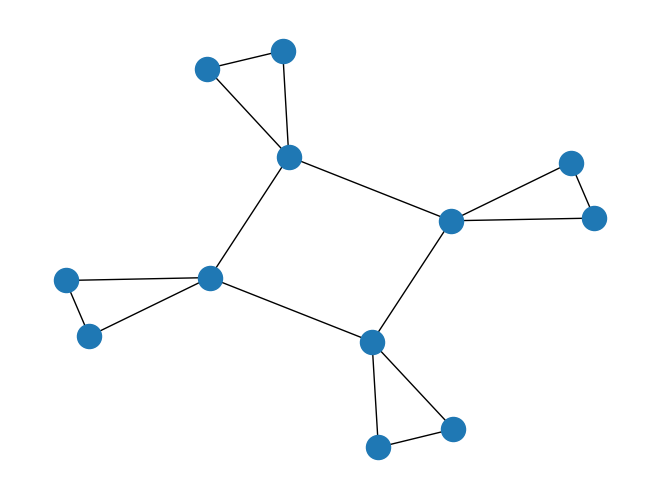

In [ ]:
A_ij_bis = np.zeros((12,12))
A_ij_bis[:6,:6] = A_ij
A_ij_bis[6:12,6:12] = A_ij
A_ij_bis[6,5] = 1
A_ij_bis[0,-1] = 1

c1 = [0,1,2]
c2 = [3,4,5]
c3 = [6,7,8]
c4 = [9,10,11]
c = c1+c2+c3+c4
G_bis = nx.from_numpy_array(A_ij_bis)
nx.draw(G_bis)

In [ ]:
print(f"Communities of G:\n C1 = ", c1, "\n C2 = ", c2, "\n C3 = ", c3, "\n C4 = ", c4)
print(f"Degree vector: ", degree_vector(G_bis))
print(f"Within community degree:", within_community_degree_vector(G_bis, [c1,c2,c3,c4]))
print(f"Within community edges:", within_community_edges(G_bis, [c1,c2,c3,c4]))
print(f"Between community degree:", between_community_degree_vector(G_bis, [c1,c2,c3,c4]))
print(f"Between community edges:", between_community_edges(G_bis, [c1,c2,c3,c4]))

Communities of G:
 C1 =  [0, 1, 2] 
 C2 =  [3, 4, 5] 
 C3 =  [6, 7, 8] 
 C4 =  [9, 10, 11]
Degree vector:  [4. 2. 2. 2. 2. 4. 4. 2. 2. 2. 2. 4.]
Within community degree: [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
Within community edges: [3. 3. 3. 3.]
Between community degree: [2. 0. 0. 0. 0. 2. 2. 0. 0. 0. 0. 2.]
Between community edges: [2. 2. 2. 2.]


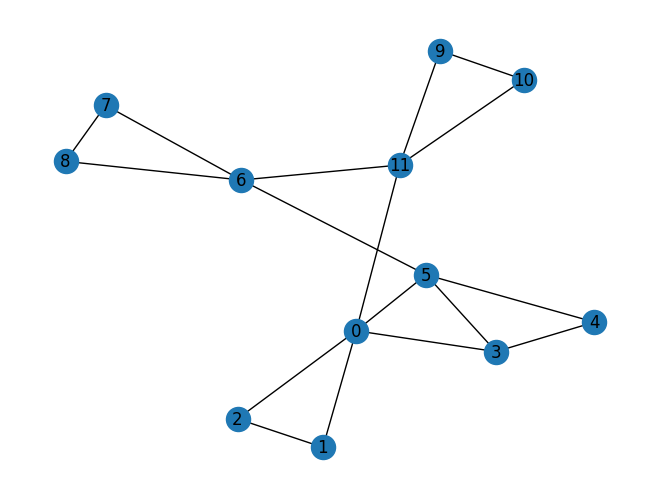

In [ ]:
A_ij_bis_bis = np.zeros((12,12))
A_ij_bis_bis[:6,:6] = A_ij
A_ij_bis_bis[6:12,6:12] = A_ij
A_ij_bis_bis[6,5] = 1
A_ij_bis_bis[5,6] = 1
A_ij_bis_bis[0,-1] = 1
A_ij_bis_bis[-1,0] = 1

# Extra edge
A_ij_bis_bis[0,3] = 1
A_ij_bis_bis[3,0] = 1

c1 = [0,1,2]
c2 = [3,4,5]
c3 = [6,7,8]
c4 = [9,10,11]
c = c1+c2+c3+c4
G_bis_bis = nx.from_numpy_array(A_ij_bis_bis)
nx.draw(G_bis_bis, with_labels = True)

In [ ]:
print(f"Communities of G:\n C1 = ", c1, "\n C2 = ", c2, "\n C3 = ", c3, "\n C4 = ", c4)
print(f"Degree vector: ", degree_vector(G_bis_bis))
print(f"Within community degree:", within_community_degree_vector(G_bis_bis, [c1,c2,c3,c4]))
print(f"Within community edges:", within_community_edges(G_bis_bis, [c1,c2,c3,c4]))
print(f"Between community degree:", between_community_degree_vector(G_bis_bis, [c1,c2,c3,c4]))
print(f"Between community edges:", between_community_edges(G_bis_bis, [c1,c2,c3,c4]))

Communities of G:
 C1 =  [0, 1, 2] 
 C2 =  [3, 4, 5] 
 C3 =  [6, 7, 8] 
 C4 =  [9, 10, 11]
Degree vector:  [5. 2. 2. 3. 2. 4. 4. 2. 2. 2. 2. 4.]
Within community degree: [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
Within community edges: [3. 3. 3. 3.]
Between community degree: [3. 0. 0. 1. 0. 2. 2. 0. 0. 0. 0. 2.]
Between community edges: [3. 3. 2. 2.]


In [ ]:
def modularity_matrix(graph, resolution: float=1) -> np.ndarray:
    adj_matrix: np.ndarray = nx.to_numpy_array(graph)
    degree_matrix: np.ndarray = degree_vector(graph)
    m: int = np.sum(degree_matrix) # This is 2m in reality
    return (                       # np.outer already contains a 1/2 factor
        adj_matrix
        - resolution * np.outer(degree_matrix, degree_matrix) / m
    )

def generalized_modularity_matrix(graph, community, resolution: float=1) -> np.ndarray:
    community = list(community)
    # Modularity matrix computed on the full network
    full_B = modularity_matrix(graph,resolution)
    # Elements B_ij inside the community
    B_bis = full_B[community,:]
    B_community = B_bis[:,community]
    # Summation over nodes inside the community (i.e., right term)
    B_i = np.sum(B_community, axis=1)
    delta = np.eye(len(community), dtype=np.int32)
    # Generalized modularity matrix
    return B_community - delta*B_i

## Properties of the generalized modularity matrix

### Full graph

In [ ]:
# Obtain B_g for the whole graph
resolution = np.random.randint(0,50)
B_g = generalized_modularity_matrix(G, c1+c2, resolution=resolution)
print(f"Sum of the elements of each row:\n", B_g.sum(axis=1))
print(f"Sum of the elements of each column:\n", B_g.sum(axis=0))
print(f"Sum of all the elements:\n", B_g.sum())

Sum of the elements of each row:
 [0.00000000e+00 1.77635684e-15 1.77635684e-15 1.77635684e-15
 3.55271368e-15 0.00000000e+00]
Sum of the elements of each column:
 [0.00000000e+00 1.77635684e-15 1.77635684e-15 1.77635684e-15
 3.55271368e-15 0.00000000e+00]
Sum of all the elements:
 0.0


In [ ]:
# Obtain B_g for the whole graph
resolution = np.random.randint(0,50)
B_g = generalized_modularity_matrix(G_bis, c1+c2+c3+c4, resolution=resolution)
print(f"Sum of the elements of each row:\n", B_g.sum(axis=1))
print(f"Sum of the elements of each column:\n", B_g.sum(axis=0))
print(f"Sum of all the elements:\n", B_g.sum())

Sum of the elements of each row:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Sum of the elements of each column:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Sum of all the elements:
 0.0


In [ ]:
# Obtain B_g for the whole graph
resolution = np.random.randint(0,50)
B_g = generalized_modularity_matrix(G_bis_bis, c1+c2+c3+c4, resolution=resolution)
print(f"Sum of the elements of each row:\n", B_g.sum(axis=1))
print(f"Sum of the elements of each column:\n", B_g.sum(axis=0))
print(f"Sum of all the elements:\n", B_g.sum())

Sum of the elements of each row:
 [-2.22044605e-16  3.33066907e-16  3.33066907e-16  1.11022302e-15
  1.22124533e-15  6.66133815e-16  8.88178420e-16  1.22124533e-15
  1.22124533e-15  1.22124533e-15  1.11022302e-15  1.77635684e-15]
Sum of the elements of each column:
 [-1.11022302e-15 -5.55111512e-16 -5.55111512e-16  2.22044605e-16
  3.33066907e-16  6.66133815e-16  8.88178420e-16  3.33066907e-16
  3.33066907e-16  3.33066907e-16  2.22044605e-16  0.00000000e+00]
Sum of all the elements:
 6.217248937900877e-15


### For each community

In [ ]:
# Obtain B_g for each community
resolution = np.random.randint(0,50)
B_gs = [generalized_modularity_matrix(G_bis_bis, cc, resolution=resolution) for cc in [c1,c2,c3,c4]]

for i, c in zip(range(len(B_gs)), [c1,c2,c3,c4]):
  print(f"Community: ", c)
  print(f"Sum of the elements of each row:\n", B_gs[i].sum(axis=1))
  print(f"Sum of the elements of each column:\n", B_gs[i].sum(axis=0))
  print(f"Sum of all the elements:\n", B_gs[i].sum())
  print("---------------------------------------------------------")

Community:  [0, 1, 2]
Sum of the elements of each row:
 [ 3.55271368e-15 -3.55271368e-15 -3.55271368e-15]
Sum of the elements of each column:
 [ 3.55271368e-15 -3.55271368e-15 -3.55271368e-15]
Sum of all the elements:
 -3.552713678800501e-15
---------------------------------------------------------
Community:  [3, 4, 5]
Sum of the elements of each row:
 [ 3.55271368e-15 -3.55271368e-15 -3.55271368e-15]
Sum of the elements of each column:
 [ 3.55271368e-15 -3.55271368e-15 -3.55271368e-15]
Sum of all the elements:
 -3.552713678800501e-15
---------------------------------------------------------
Community:  [6, 7, 8]
Sum of the elements of each row:
 [0. 0. 0.]
Sum of the elements of each column:
 [0. 0. 0.]
Sum of all the elements:
 0.0
---------------------------------------------------------
Community:  [9, 10, 11]
Sum of the elements of each row:
 [0. 0. 0.]
Sum of the elements of each column:
 [0. 0. 0.]
Sum of all the elements:
 0.0
--------------------------------------------------

In [ ]:
# Obtain B_g for each community
resolution = np.random.randint(0,50)
B_gs = [generalized_modularity_matrix(G_bis, cc, resolution=resolution) for cc in [c1,c2,c3,c4]]

for i, c in zip(range(len(B_gs)), [c1,c2,c3,c4]):
  print(f"Community: ", c)
  print(f"Sum of the elements of each row:\n", B_gs[i].sum(axis=1))
  print(f"Sum of the elements of each column:\n", B_gs[i].sum(axis=0))
  print(f"Sum of all the elements:\n", B_gs[i].sum())
  print("---------------------------------------------------------")

Community:  [0, 1, 2]
Sum of the elements of each row:
 [0. 0. 0.]
Sum of the elements of each column:
 [0. 0. 0.]
Sum of all the elements:
 0.0
---------------------------------------------------------
Community:  [3, 4, 5]
Sum of the elements of each row:
 [0. 0. 0.]
Sum of the elements of each column:
 [0. 0. 0.]
Sum of all the elements:
 0.0
---------------------------------------------------------
Community:  [6, 7, 8]
Sum of the elements of each row:
 [0. 0. 0.]
Sum of the elements of each column:
 [0. 0. 0.]
Sum of all the elements:
 0.0
---------------------------------------------------------
Community:  [9, 10, 11]
Sum of the elements of each row:
 [0. 0. 0.]
Sum of the elements of each column:
 [0. 0. 0.]
Sum of all the elements:
 0.0
---------------------------------------------------------


In [ ]:
# Obtain B_g for each community
resolution = np.random.randint(0,50)
B_gs = [generalized_modularity_matrix(G, cc, resolution=resolution) for cc in [c1,c2]]

for i, c in zip(range(len(B_gs)), [c1,c2]):
  print(f"Community: ", c)
  print(f"Sum of the elements of each row:\n", B_gs[i].sum(axis=1))
  print(f"Sum of the elements of each column:\n", B_gs[i].sum(axis=0))
  print(f"Sum of all the elements:\n", B_gs[i].sum())
  print("---------------------------------------------------------")

Community:  [0, 1, 2]
Sum of the elements of each row:
 [0. 0. 0.]
Sum of the elements of each column:
 [0. 0. 0.]
Sum of all the elements:
 0.0
---------------------------------------------------------
Community:  [3, 4, 5]
Sum of the elements of each row:
 [0. 0. 0.]
Sum of the elements of each column:
 [0. 0. 0.]
Sum of all the elements:
 0.0
---------------------------------------------------------


## Let's implement the QUBO function for $\textbf{B}^{g}$

Due to the properties computed above, the QUBO function to optimize is quadratic on both variables. The explicit linear terms that appeared in the simpler case of diving a network in 2 communities no longer appear explicitly and are, instead, contained in the quadratic function that follows:

$\Delta Q = \frac{1}{m} \sum_{i,j \in g} B_{ij}^{g} x_i x_j$,

where $x_i=\{0,1\}$ for every node in the graph.

In [ ]:
def two_communities_energy_state(state, modularity, degrees, m, resolution=1):
  state = np.array(state, dtype=np.int16)
  degrees = np.array(degrees, dtype=np.float32)
  Q = -(1/m)*(state @ modularity @ state.T) + ((1-resolution)/m)*(degrees@state.T) - (1-resolution)/2
  return Q

def hierarchical_division_energy_state(state, B_g, m, resolution=1):
  state = np.array(state, dtype=np.int16)
  Q = -(1/m)*(state @ B_g @ state.T)
  return Q

In [ ]:
resolution = 1
KARATE = nx.karate_club_graph()
# First binary division obtained by the Advantage solver
c_2_L = [[0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]
B_KARATE = modularity_matrix(KARATE, resolution=resolution)        # Full modularity matrix
_, degrees_KARATE = zip(*dict(nx.degree(KARATE)).items())    # degree vector
m_KARATE = 0.5*np.sum(degrees_KARATE)                        # total number of edges

# Nodes belonging to each one of the two communities
c1, c2 = c_2_L
# Entries of the mod matix that contribute to c1
B_KARATE_1 = generalized_modularity_matrix(KARATE, c1, resolution=resolution)
degrees_KARATE_1 = np.array(degrees_KARATE, dtype=np.int32)[c1]
# Entries of the mod matix that contribute to c2
B_KARATE_2 = generalized_modularity_matrix(KARATE, c2, resolution=resolution)
degrees_KARATE_2 = np.array(degrees_KARATE, dtype=np.int32)[c2]

# Compute all the possible states
import itertools
qbits_1, qbits_2 = len(c1), len(c2)
states_1, states_2 = [], []
for x in itertools.product(range(2), repeat=qbits_1):
  states_1.append(x)
assert len(states_1) == 2**qbits_1
for x in itertools.product(range(2), repeat=qbits_2):
  states_2.append(x)
assert len(states_2) == 2**qbits_2

In [ ]:
# Using the new formulation for all gammas
Energies1, Energies2 = {}, {}
for s in states_1:
  Energies1[s] = hierarchical_division_energy_state(s, B_KARATE_1, m_KARATE, resolution=resolution)
for s in states_2:
  Energies2[s] = hierarchical_division_energy_state(s, B_KARATE_2, m_KARATE, resolution=resolution)

ground_state1, ground_energy1 = min(Energies1, key=Energies1.get), min(Energies1.values())
ground_state2, ground_energy2 = min(Energies2, key=Energies2.get), min(Energies2.values())
c11 = {c1[k] for k,v in enumerate(ground_state1) if v == 0}
c12 = {c1[k] for k,v in enumerate(ground_state1) if v == 1}
c21 = {c2[k] for k,v in enumerate(ground_state2) if v == 0}
c22 = {c2[k] for k,v in enumerate(ground_state2) if v == 1}
print("Partition of c1: ", ground_state1, " and energy: ", ground_energy1)
print("Partition of c2: ", ground_state2, " and energy: ", ground_energy2)

Partition of c1:  (0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0)  and energy:  -0.09149184149184149
Partition of c2:  (1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1)  and energy:  -0.030747030747030807


In [ ]:
# Using the formula for resolution equalt to 1
Energies1, Energies2 = {}, {}
for s in states_1:
  Energies1[s] = two_communities_energy_state(s, B_KARATE_1, degrees_KARATE_1, m_KARATE, resolution=resolution)
for s in states_2:
  Energies2[s] = two_communities_energy_state(s, B_KARATE_2, degrees_KARATE_2, m_KARATE, resolution=resolution)

ground_state1, ground_energy1 = min(Energies1, key=Energies1.get), min(Energies1.values())
ground_state2, ground_energy2 = min(Energies2, key=Energies2.get), min(Energies2.values())
c11 = {c1[k] for k,v in enumerate(ground_state1) if v == 0}
c12 = {c1[k] for k,v in enumerate(ground_state1) if v == 1}
c21 = {c2[k] for k,v in enumerate(ground_state2) if v == 0}
c22 = {c2[k] for k,v in enumerate(ground_state2) if v == 1}
print("Partition of c1: ", ground_state1, " and energy: ", ground_energy1)
print("Partition of c2: ", ground_state2, " and energy: ", ground_energy2)

Partition of c1:  (0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0)  and energy:  -0.09149184149184149
Partition of c2:  (1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1)  and energy:  -0.030747030747030807


They are equivalent, as we hoped for. That means, that with the generalized modularity matrix, we do not need to account for any explicit linear terms!!

# Directed networks


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pylab as plt

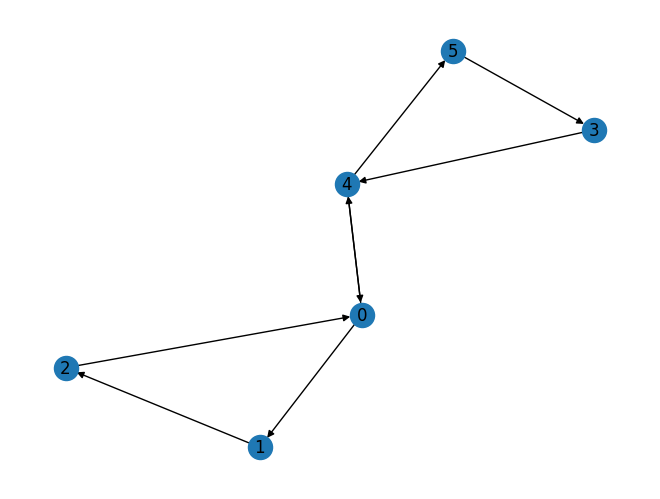

In [ ]:
# Create empty graph
G = nx.DiGraph()

# Resolution
res = 1

# Add edges to the graph (also adds nodes)
G.add_edges_from([(0,1),(1,2),(2,0), (3,4),(4,5),(5,3), (0,4), (4,0)])
nx.draw(G, with_labels = True)
c1 = [0,1,2]
c2 = [3,4,5]
c = c1+c2
A_ij = nx.to_numpy_array(G, nodelist=c)

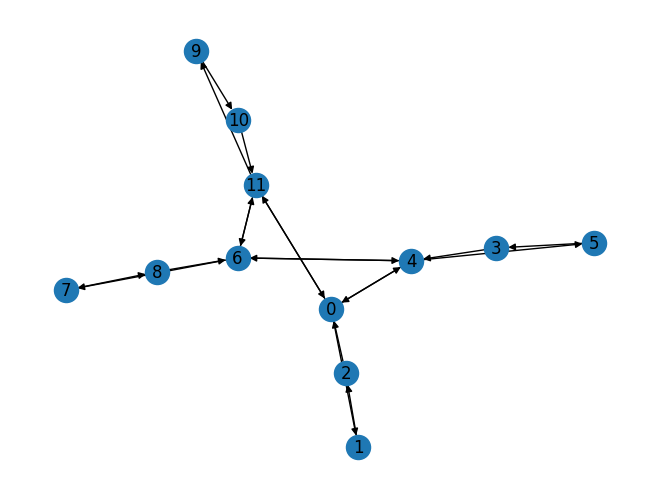

In [ ]:
# Slightly more complicated graph
A_ij_bis = np.zeros((12,12))
A_ij_bis[:6,:6] = A_ij
A_ij_bis[6:,6:] = A_ij
A_ij_bis[6,4] = 1
A_ij_bis[4,6] = 1
A_ij_bis[0,-1] = 1
A_ij_bis[-1,0] = 1
A_ij_bis[6,-1] = 1
A_ij_bis[-1,6] = 1
A_ij_bis[6,10] = 0
A_ij_bis[10,6] = 0

c3 = [6,7,8]
c4 = [9,10,11]
c = c1+c2+c3+c4
G_bis = nx.from_numpy_array(A_ij_bis, create_using=nx.DiGraph)
nx.draw(G_bis, with_labels = True)

In [ ]:
def in_degree_vector(graph) -> np.ndarray:
    adj_matrix: np.ndarray = nx.to_numpy_array(graph)
    in_degree_vector: np.ndarray = adj_matrix.sum(axis=1)
    return in_degree_vector

def out_degree_vector(graph) -> np.ndarray:
    adj_matrix: np.ndarray = nx.to_numpy_array(graph)
    out_degree_vector: np.ndarray = adj_matrix.sum(axis=0)
    return out_degree_vector

def directed_modularity_matrix(graph, resolution: float=1) -> np.ndarray:
    adj_matrix: np.ndarray = nx.to_numpy_array(graph)
    in_degree: np.ndarray = in_degree_vector(graph)
    out_degree: np.ndarray = out_degree_vector(graph)
    m: int = np.sum(adj_matrix) # We sum over A instead of over the degrees!!!
    return (
        adj_matrix
        - resolution * np.outer(in_degree, out_degree) / m
    )

def directed_generalized_modularity_matrix(graph, community, resolution: float=1, return_B: bool=False) -> np.ndarray:
    community = list(community)
    # Modularity matrix computed on the full network
    full_B = directed_modularity_matrix(graph,resolution)
    # Elements B_ij inside the community
    B_bis = full_B[community,:]
    B_community = B_bis[:,community]
    # Summation over nodes inside the community (i.e., right term)
    B_i = np.sum(B_community, axis=1)
    delta = np.eye(len(community), dtype=np.int32)
    # Generalized modularity matrix
    if return_B:
      return B_community - delta*B_i, B_community
    else:
      return B_community - delta*B_i

## Properties of the directed generalized modularity matrix

### Full graph

In [ ]:
# Obtain B_g for the whole graph
resolution = np.random.randint(0,50)
B_g = directed_generalized_modularity_matrix(G, c1+c2, resolution=resolution)
print(f"Sum of the elements of each row:\n", B_g.sum(axis=1))
print(f"Sum of the elements of each column:\n", B_g.sum(axis=0))
print(f"Sum of all the elements:\n", B_g.sum())

Sum of the elements of each row:
 [0. 0. 0. 0. 0. 0.]
Sum of the elements of each column:
 [0. 0. 0. 0. 0. 0.]
Sum of all the elements:
 0.0


### For each community

In [ ]:
# Obtain B_g for each community
resolution = np.random.randint(0,50)
B_gs = [directed_generalized_modularity_matrix(G_bis, cc, resolution=resolution) for cc in [c1,c2,c3,c4,c1+c2]]

for i, c in zip(range(len(B_gs)), [c1,c2,c3,c4,c1+c2]):
  print(f"Community: ", c)
  print(f"Sum of the elements of each row:\n", B_gs[i].sum(axis=1))
  print(f"Sum of the elements of each column:\n", B_gs[i].sum(axis=0))
  print(f"Sum of all the elements:\n", B_gs[i].sum())
  print("---------------------------------------------------------")

Community:  [0, 1, 2]
Sum of the elements of each row:
 [0. 0. 0.]
Sum of the elements of each column:
 [0. 0. 0.]
Sum of all the elements:
 0.0
---------------------------------------------------------
Community:  [3, 4, 5]
Sum of the elements of each row:
 [0. 0. 0.]
Sum of the elements of each column:
 [0. 0. 0.]
Sum of all the elements:
 4.440892098500626e-16
---------------------------------------------------------
Community:  [6, 7, 8]
Sum of the elements of each row:
 [0. 0. 0.]
Sum of the elements of each column:
 [0. 0. 0.]
Sum of all the elements:
 0.0
---------------------------------------------------------
Community:  [9, 10, 11]
Sum of the elements of each row:
 [0. 0. 0.]
Sum of the elements of each column:
 [0. 0. 0.]
Sum of all the elements:
 8.881784197001252e-16
---------------------------------------------------------
Community:  [0, 1, 2, 3, 4, 5]
Sum of the elements of each row:
 [ 8.88178420e-16  1.33226763e-15  1.33226763e-15  1.33226763e-15
 -8.88178420e-16  0.

In [ ]:
LC = nx.community.louvain_communities(G)
LM = nx.community.modularity(G,LC)
My_M = nx.community.modularity(G,[{0,1,2},{3,4,5}])
print(LC, LM, My_M)

[{0, 1, 2}, {3, 4, 5}] 0.25 0.25


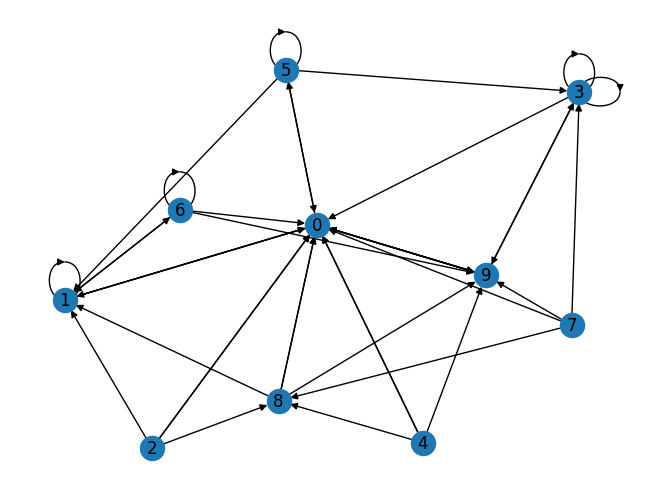

In [ ]:
G_test = nx.random_k_out_graph(10, 4, 1)
A_test = nx.to_numpy_array(G_test)
resolution = np.random.randint(0,50)
LC_test = nx.community.louvain_communities(G_test)
B_test = directed_modularity_matrix(G_test,  resolution=resolution)
B_g_test = directed_generalized_modularity_matrix(G_test, community=range(10), resolution=resolution)
nx.draw(G_test, with_labels=True)

In [ ]:
# Obtain B_g for the whole graph
resolution = np.random.randint(0,50)
B_g = directed_generalized_modularity_matrix(G_test, community=range(10), resolution=resolution)
print(f"Sum of the elements of each row (sum over columns):\n", B_g.sum(axis=1))
print(f"Sum of the elements of each column (sum over rows):\n", B_g.sum(axis=0))
print(f"Sum of all the elements:\n", B_g.sum())
sum_rows = (1-resolution)*(A_test.sum(axis=0)-A_test.sum(axis=1))

Sum of the elements of each row (sum over columns):
 [-4.44089210e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.55271368e-15 -3.55271368e-15 -3.55271368e-15 -3.55271368e-15
  1.77635684e-15  0.00000000e+00]
Sum of the elements of each column (sum over rows):
 [-77. -14.  28.  -7.  28.  14.  14.  28.   7. -21.]
Sum of all the elements:
 0.0


In [ ]:
# Obtain B_g for each community
resolution = np.random.randint(0,50)
B_s = [directed_generalized_modularity_matrix(G_test, cc, resolution=resolution, return_B=True)[1] for cc in LC_test]
B_gs = [directed_generalized_modularity_matrix(G_test, cc, resolution=resolution) for cc in LC_test]

for i, c in zip(range(len(B_gs)), LC_test):
  B_bis = B_s[i]-B_s[i].T
  print(f"Community: ", c)
  print(f"Sum of the elements of each row (sum over columns):\n", B_gs[i].sum(axis=1))
  print(f"Sum of the elements of each column (sum over rows):\n", B_gs[i].sum(axis=0))
  print(f"Sum over rows of B_bis = B - B':\n", (B_bis).sum(axis=0))
  print(f"Sum of all the elements:\n", B_gs[i].sum())
  print("---------------------------------------------------------")

Community:  {3, 5}
Sum of the elements of each row (sum over columns):
 [0. 0.]
Sum of the elements of each column (sum over rows):
 [-0.5  0.5]
Sum over rows of B_bis = B - B':
 [-0.5  0.5]
Sum of all the elements:
 0.0
---------------------------------------------------------
Community:  {1, 6}
Sum of the elements of each row (sum over columns):
 [0. 0.]
Sum of the elements of each column (sum over rows):
 [-2.  2.]
Sum over rows of B_bis = B - B':
 [-2.  2.]
Sum of all the elements:
 0.0
---------------------------------------------------------
Community:  {0, 2, 4, 7, 8, 9}
Sum of the elements of each row (sum over columns):
 [0. 0. 0. 0. 0. 0.]
Sum of the elements of each column (sum over rows):
 [-24.5   9.5   8.5   9.5   3.5  -6.5]
Sum over rows of B_bis = B - B':
 [-24.5   9.5   8.5   9.5   3.5  -6.5]
Sum of all the elements:
 0.0
---------------------------------------------------------


## Symmetrized and generalized modularity matrix

In [ ]:
def symmetrized_generalized_modularity_matrix(graph, community, resolution: float=1) -> np.ndarray:
    community = list(community)
    # Modularity matrix computed on the full network
    full_B = directed_modularity_matrix(graph,resolution)
    # Elements B_ij inside the community
    B_bis = full_B[community,:]
    B_community = B_bis[:,community]
    # Summation over nodes inside the community (i.e., right term)
    B_i = np.sum(B_community, axis=1)
    B_j = np.sum(B_community.T, axis=1)
    delta = np.eye(len(community), dtype=np.int32)
    # Generalized modularity matrix
    return 0.5*( B_community + B_community.T ) - 0.5 * delta * (B_i + B_j)

In [ ]:
N = 50
G_test = nx.random_k_out_graph(N, 4, 1)
A_test = nx.to_numpy_array(G_test)
LC_test = nx.community.louvain_communities(G_test)

### Full graph

In [ ]:
resolution = np.random.randint(0,50)
B_dir_gen_symm = symmetrized_generalized_modularity_matrix(G_test, community=range(N), resolution=resolution)

print(f"Sum of the elements of each row:\n", B_dir_gen_symm.sum(axis=1))
print(f"Sum of the elements of each column:\n", B_dir_gen_symm.sum(axis=0))
print(f"Sum of all the elements:\n", B_dir_gen_symm.sum())

Sum of the elements of each row:
 [ 1.44328993e-15 -1.19904087e-14  6.66133815e-15 -4.44089210e-16
 -8.21565038e-15 -2.22044605e-15  5.21804822e-15 -1.33226763e-15
  1.33226763e-15  1.33226763e-15  6.66133815e-15  3.77475828e-15
  3.10862447e-15 -4.44089210e-16 -4.66293670e-15 -1.33226763e-15
  1.33226763e-15  1.33226763e-15 -4.44089210e-16 -4.44089210e-16
  1.66533454e-15 -4.44089210e-16 -8.43769499e-15 -4.44089210e-16
 -6.88338275e-15 -1.11022302e-15 -6.66133815e-15  4.44089210e-16
 -8.21565038e-15 -6.66133815e-15 -4.66293670e-15 -2.22044605e-15
 -1.11022302e-14 -1.11022302e-14  5.10702591e-15 -1.33226763e-15
 -6.66133815e-15  2.22044605e-15 -1.44328993e-15 -3.44169138e-15
 -4.88498131e-15 -2.22044605e-15 -4.44089210e-16  5.99520433e-15
  2.22044605e-15  1.33226763e-15  2.22044605e-16 -1.33226763e-15
 -2.22044605e-15  0.00000000e+00]
Sum of the elements of each column:
 [ 1.44328993e-15 -6.26165786e-14  3.55271368e-15 -3.55271368e-15
 -1.97619698e-14 -4.44089210e-15  1.34336986e-14 -

### For each community

In [ ]:
# Obtain B_g for each community
resolution = np.random.randint(0,50)
B_dirs_gen_symm = [symmetrized_generalized_modularity_matrix(G_test, community=cc, resolution=resolution) for cc in LC_test]

for i, c in zip(range(len(B_gs)), LC_test):
  print(f"Community: ", c)
  print(f"Sum of the elements of each row:\n", B_dirs_gen_symm[i].sum(axis=1))
  print(f"Sum of the elements of each column:\n", B_dirs_gen_symm[i].sum(axis=0))
  print(f"Sum of all the elements:\n", B_dirs_gen_symm[i].sum())
  print("---------------------------------------------------------")

Community:  {33, 36, 5, 7, 8, 10, 46, 16, 27}
Sum of the elements of each row:
 [ 3.55271368e-15  0.00000000e+00 -8.88178420e-16 -8.88178420e-16
 -4.44089210e-16 -4.44089210e-16 -8.88178420e-16 -4.44089210e-16
  3.55271368e-15]
Sum of the elements of each column:
 [-8.88178420e-16 -4.44089210e-15 -4.44089210e-16  8.88178420e-16
 -4.44089210e-16 -4.44089210e-16  8.88178420e-16 -4.44089210e-16
  3.55271368e-15]
Sum of all the elements:
 -1.7763568394002505e-14
---------------------------------------------------------
Community:  {6, 39, 41, 12, 13, 15, 17, 20, 22, 23, 28, 31}
Sum of the elements of each row:
 [-1.44328993e-15 -1.99840144e-15  8.88178420e-16 -9.43689571e-16
 -9.43689571e-16 -2.22044605e-16  8.88178420e-16  3.33066907e-16
  1.55431223e-15  2.22044605e-15 -3.99680289e-15  0.00000000e+00]
Sum of the elements of each column:
 [ 3.33066907e-16 -2.22044605e-16  8.88178420e-16  8.32667268e-16
  8.32667268e-16  1.55431223e-15  0.00000000e+00  2.10942375e-15
  1.55431223e-15  9.32

### For undirected networks

In [ ]:
resolution = np.random.randint(0,50)
N = 5
G_symm = nx.erdos_renyi_graph(N, p=0.4)
B_und = generalized_modularity_matrix(G_symm, community=range(N), resolution=resolution)
B_symm = symmetrized_generalized_modularity_matrix(G_symm, community=range(N), resolution=resolution)
B_und - B_symm

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
resolution = np.random.randint(0,50)
N = 5
cc = [1,N-2,N-1]
G_symm = nx.erdos_renyi_graph(N, p=0.4)
B_und = generalized_modularity_matrix(G_symm, community=cc, resolution=resolution)
B_symm = symmetrized_generalized_modularity_matrix(G_symm, community=cc, resolution=resolution)
B_und - B_symm

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

## Let's implement the QUBO function for $\textbf{B}^{d,g}$

In [ ]:
def hierarchical_division_energy_state(state, B_g, m, resolution=1):
  state = np.array(state, dtype=np.int16)
  Q = -(1/m)*(state @ B_g @ state.T)
  return Q

In [ ]:
resolution = 1
G_test = nx.random_k_out_graph(10, 4, 1)

_, degrees_G_test = zip(*dict(nx.degree(G_test)).items())    # degree vector
degrees_G_test = np.array(degrees_G_test, dtype=np.int32)
B_G_test = symmetrized_generalized_modularity_matrix(G_test, range(10), resolution=resolution)
m_G_test = np.sum(degrees_G_test)                            # total number of edges

# Compute all the possible states
import itertools
qbits_1 = 10
states_1 = []
for x in itertools.product(range(2), repeat=qbits_1):
  states_1.append(x)
assert len(states_1) == 2**qbits_1

In [ ]:
# Using the new formulation for all gammas
Energies1 = {}
for s in states_1:
  Energies1[s] = hierarchical_division_energy_state(s, B_G_test, m_G_test, resolution=resolution)

ground_state1, ground_energy1 = min(Energies1, key=Energies1.get), min(Energies1.values())
c1 = {np.arange(10)[k] for k,v in enumerate(ground_state1) if v == 0}
c2 = {np.arange(10)[k] for k,v in enumerate(ground_state1) if v == 1}
print("Partition of c1: ", ground_state1, " and energy: ", ground_energy1)
print("\n")
e = hierarchical_division_energy_state(np.arange(10)*0+np.random.randint(0,1), B_G_test, m_G_test, resolution=resolution)
print(f"Energy if all nodes are in the same community: {e}")
print("\n")
c_L = nx.community.louvain_communities(G_test, resolution=0.8) # Here we use a different resolution to force the algorithm to find 2 communities
Mod_L = nx.community.modularity(G_test, c_L, resolution=resolution) # But we evaluate the solution with the same resolution in order to be comparable
Mod_QUBO =  nx.community.modularity(G_test, [c1, c2], resolution=resolution)
print("Louvain solution: ", c_L, " with Q = ", Mod_L)
print("QUBO solution: ", [c1, c2], " with Q = ", Mod_QUBO)

Partition of c1:  (0, 0, 1, 0, 1, 0, 1, 1, 0, 0)  and energy:  -0.06000000000000001


Energy if all nodes are in the same community: -0.0


Louvain solution:  [{0, 1, 3, 5, 8, 9}, {2, 4, 6, 7}]  with Q =  0.23999999999999996
QUBO solution:  [{0, 1, 3, 5, 8, 9}, {2, 4, 6, 7}]  with Q =  0.23999999999999996


As expected by the theory and math, the symmetrized generalized modularity matrix, and corresponding QUBO return the same solution as the Louvain for directed networks.